# Graph State Benchmark Example

In [1]:
%load_ext autoreload
%autoreload 2

# Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
#backend = "fakeapollo"
#backend = "garnet"

**Set IQM Token if using Resonance.**

In [3]:
import os
token = "XXXXXXXXXXXXXX"
os.environ["IQM_TOKEN"] = token

from iqm.benchmarks.utils import get_iqm_backend
backend=get_iqm_backend("garnet")

# from iqm.qiskit_iqm.iqm_provider import IQMProvider
# iqm_url="https://cocos.resonance.meetiqm.com/garnet"
# provider = IQMProvider(iqm_url)
# backend = provider.get_backend()

C:\Users\RaphaelBrieger\miniconda3\envs\graph-test\Lib\site-packages\iqm\iqm_client\iqm_client.py:135: UserWarning: Your IQM Client version 20.17 was built for a different version of IQM Server. You might encounter issues. For the best experience, consider using a version of IQM Client that satisfies 22.3 <= iqm-client < 23.0.
  warnings.warn(version_incompatibility_msg)


In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Graph State Configuration

In [ ]:
from iqm.benchmarks.entanglement.graph_states import *

In [ ]:
EXAMPLE_GRAPHSTATE = GraphStateConfiguration(
    qubits=list(range(backend.num_qubits)),
    shots=2**10,
    tomography="state_tomography",
    num_bootstraps = 150,
    # n_random_unitaries=25,
    # n_median_of_means=4,
    #max_gates_per_batch=40_000,
)

In [7]:
benchmark_graphstate = GraphStateBenchmark(backend, EXAMPLE_GRAPHSTATE)
run_graphstate = benchmark_graphstate.run()

2025-03-24 12:32:37,266 - iqm.benchmarks.logging_config - INFO - Identifying qubit pairs and neighbor groups for the Graph State benchmark
2025-03-24 12:32:37,266 - iqm.benchmarks.logging_config - INFO - Performing state tomography of all qubit pairs
2025-03-24 12:32:37,266 - iqm.benchmarks.logging_config - INFO - Now on group 1/10
2025-03-24 12:32:37,266 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (11, 10) and neighbors {5, 6, 9, 15, 16}
2025-03-24 12:32:37,274 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (18, 17) and neighbors {13, 14, 19}
2025-03-24 12:32:37,279 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (7, 12) and neighbors {2, 8, 13}
2025-03-24 12:32:37,284 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (3, 4) and neighbors {0, 1, 2, 5, 8, 9}
2025-03-24 12:32:37,284 - iqm.benchmarks.logging_config - INFO - Submitting batch with 36 circuits corresponding to qubits [11, 10, 18, 17, 7, 12, 3, 4]
C:\Users\RaphaelBrieger\minicon

In [8]:
result_graphstate = benchmark_graphstate.analyze()

2025-03-24 12:39:15,799 - iqm.benchmarks.logging_config - INFO - Fetching dataset
2025-03-24 12:39:15,968 - iqm.benchmarks.logging_config - INFO - Dataset imported OK
2025-03-24 12:39:15,968 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 1/10
2025-03-24 12:39:17,186 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 2/10
2025-03-24 12:39:18,326 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 3/10
2025-03-24 12:39:19,437 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 4/10
2025-03-24 12:39:20,260 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 5/10
2025-03-24 12:39:21,069 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 f

dict_keys(['(7, 2)', '(3, 2)', '(5, 10)', '(13, 12)', '(3, 0)', '(7, 12)', '(13, 17)', '(3, 4)', '(3, 8)', '(5, 4)', '(18, 17)', '(5, 6)', '(15, 10)', '(13, 14)', '(15, 16)', '(11, 16)', '(11, 10)', '(13, 8)', '(9, 4)', '(15, 14)', '(1, 4)', '(11, 6)', '(15, 19)', '(9, 8)', '(1, 0)', '(18, 14)', '(7, 8)', '(18, 19)', '(9, 10)', '(9, 14)'])


**Displaying the maximum negativity for all qubit pairs**

The negativity is shown as a percentage of the ideal maximum value of 0.5 (which would be achieved on a noiseless backend).

In [9]:
for idx, o in enumerate(result_graphstate.observations):
    if idx == 0:
        print(f"Observations: {o.name}\n****************************\n")
    print(f"{o.identifier.qubit_indices}: {100.0*(o.value/0.5):.2f} +/- {100.0*(o.uncertainty/0.5):.2f} %")

Observations: max_negativity
****************************

(11, 10): 76.70 +/- 4.28 %
(18, 17): 73.06 +/- 2.60 %
(7, 12): 65.61 +/- 2.96 %
(3, 4): 69.19 +/- 7.07 %
(13, 8): 78.09 +/- 7.86 %
(11, 16): 76.26 +/- 2.32 %
(5, 4): 72.77 +/- 6.22 %
(18, 19): 83.18 +/- 1.89 %
(1, 0): 81.07 +/- 1.34 %
(13, 14): 74.47 +/- 6.93 %
(5, 10): 64.13 +/- 4.85 %
(7, 2): 31.72 +/- 3.51 %
(15, 16): 75.71 +/- 3.23 %
(5, 6): 73.19 +/- 2.41 %
(9, 8): 80.60 +/- 9.99 %
(11, 6): 79.54 +/- 2.21 %
(9, 14): 85.80 +/- 6.95 %
(3, 0): 65.54 +/- 4.51 %
(15, 19): 79.66 +/- 3.27 %
(13, 17): 66.76 +/- 3.46 %
(9, 4): 78.34 +/- 7.13 %
(3, 2): 45.04 +/- 5.03 %
(15, 14): 78.67 +/- 7.04 %
(9, 10): 84.50 +/- 8.02 %
(13, 12): 65.13 +/- 3.97 %
(15, 10): 73.50 +/- 7.10 %
(3, 8): 71.74 +/- 9.70 %
(7, 8): 83.07 +/- 6.08 %
(1, 4): 79.20 +/- 3.04 %
(18, 14): 81.14 +/- 4.70 %


**Inspect the available plots**

In [10]:
result_graphstate.plots.keys()

dict_keys(['(11, 10)', '(18, 17)', '(7, 12)', '(3, 4)', '(13, 8)', '(11, 16)', '(5, 4)', '(18, 19)', '(1, 0)', '(13, 14)', '(5, 10)', '(7, 2)', '(15, 16)', '(5, 6)', '(9, 8)', '(11, 6)', '(9, 14)', '(3, 0)', '(15, 19)', '(13, 17)', '(9, 4)', '(3, 2)', '(15, 14)', '(9, 10)', '(13, 12)', '(15, 10)', '(3, 8)', '(7, 8)', '(1, 4)', '(18, 14)', 'max_negativities_IQM Backend_20250324-123237', 'max_negativities_graph_20250324-123237'])

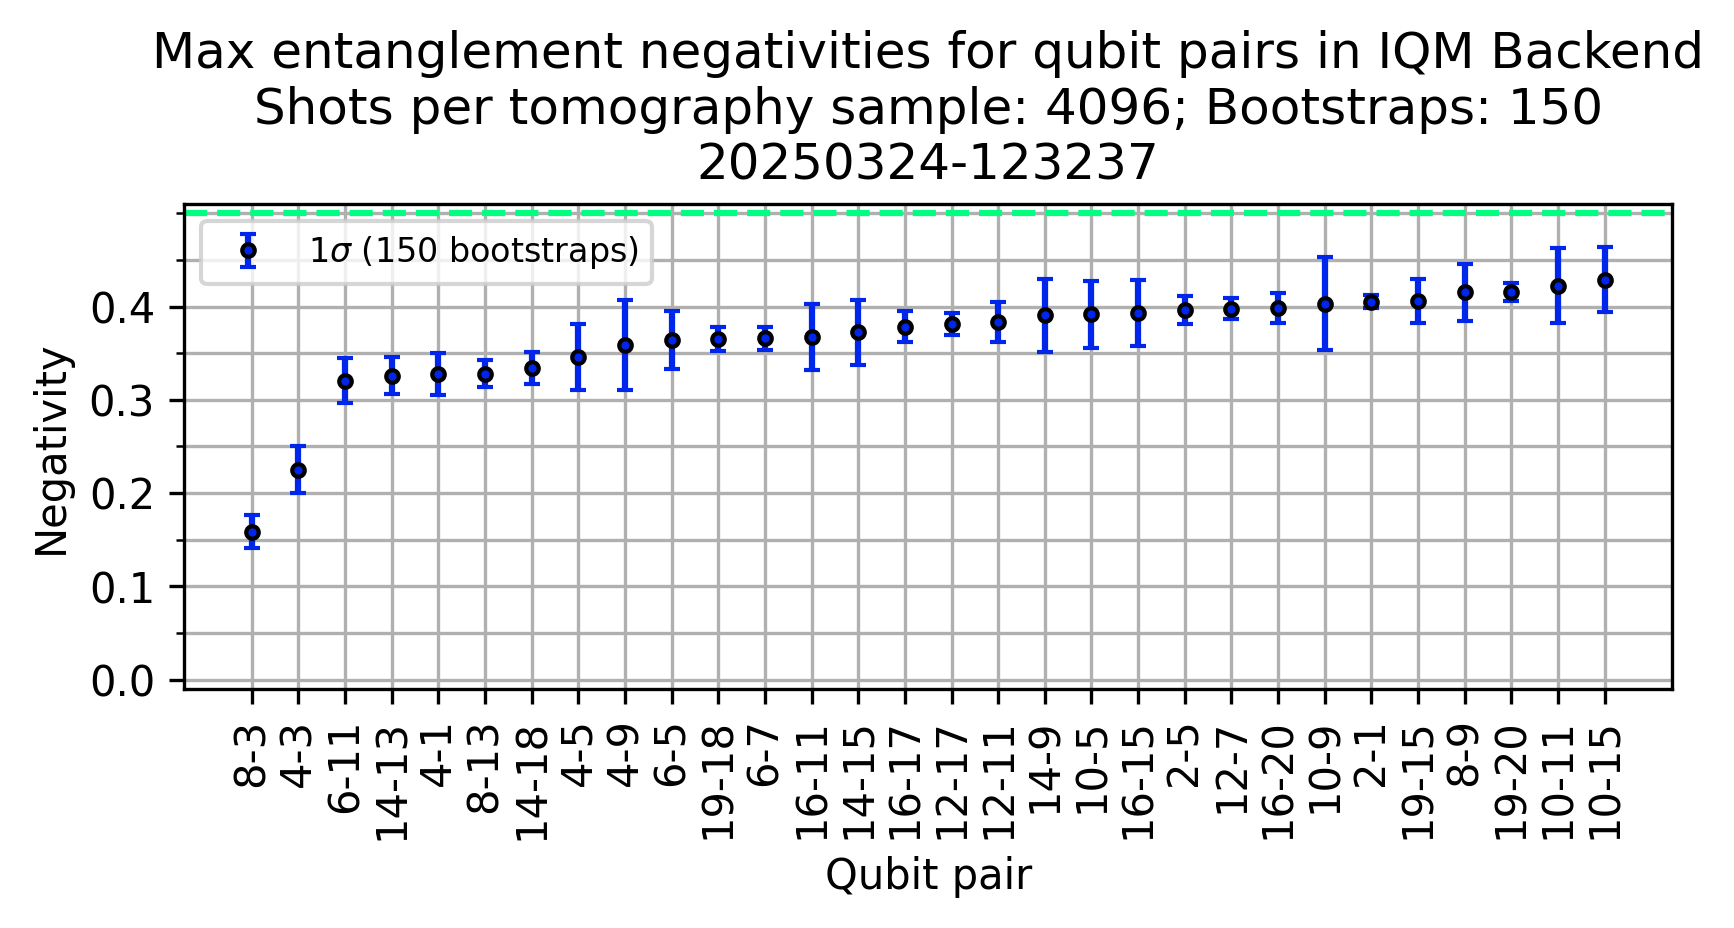

In [26]:
result_graphstate.plots['max_negativities_IQM Backend_20250324-123237']

**Plot the lowest and highest negativity resconstructed density matrices**

In [47]:
observation_dict = {obs.identifier.qubit_indices: obs.value for obs in result_graphstate.observations}
sorted_indices = np.argsort(list(observation_dict.values()))
lowest_negativity_pair = list(observation_dict.keys())[sorted_indices[0]]
highest_negativity_pair = list(observation_dict.keys())[sorted_indices[-1]]

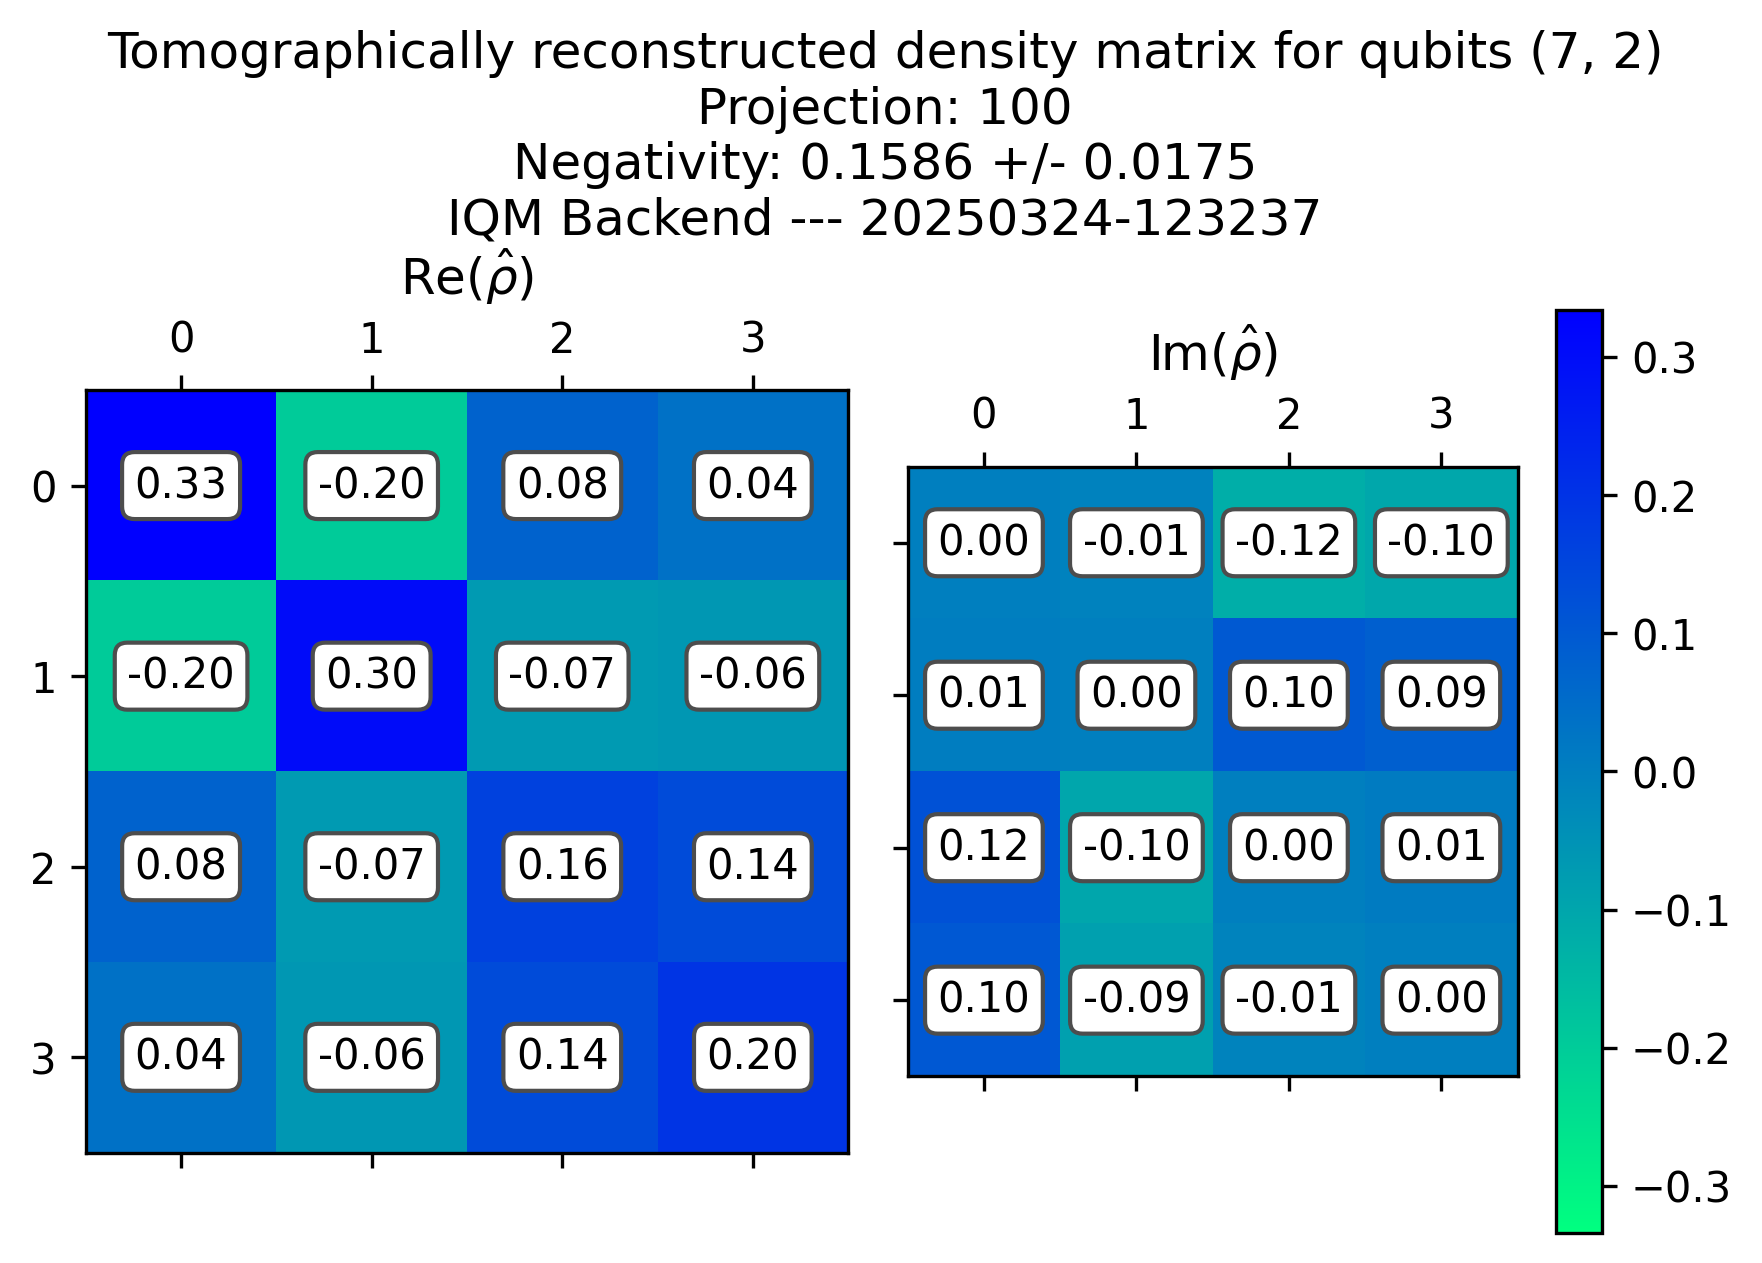

In [48]:
result_graphstate.plots[f"{lowest_negativity_pair}"]

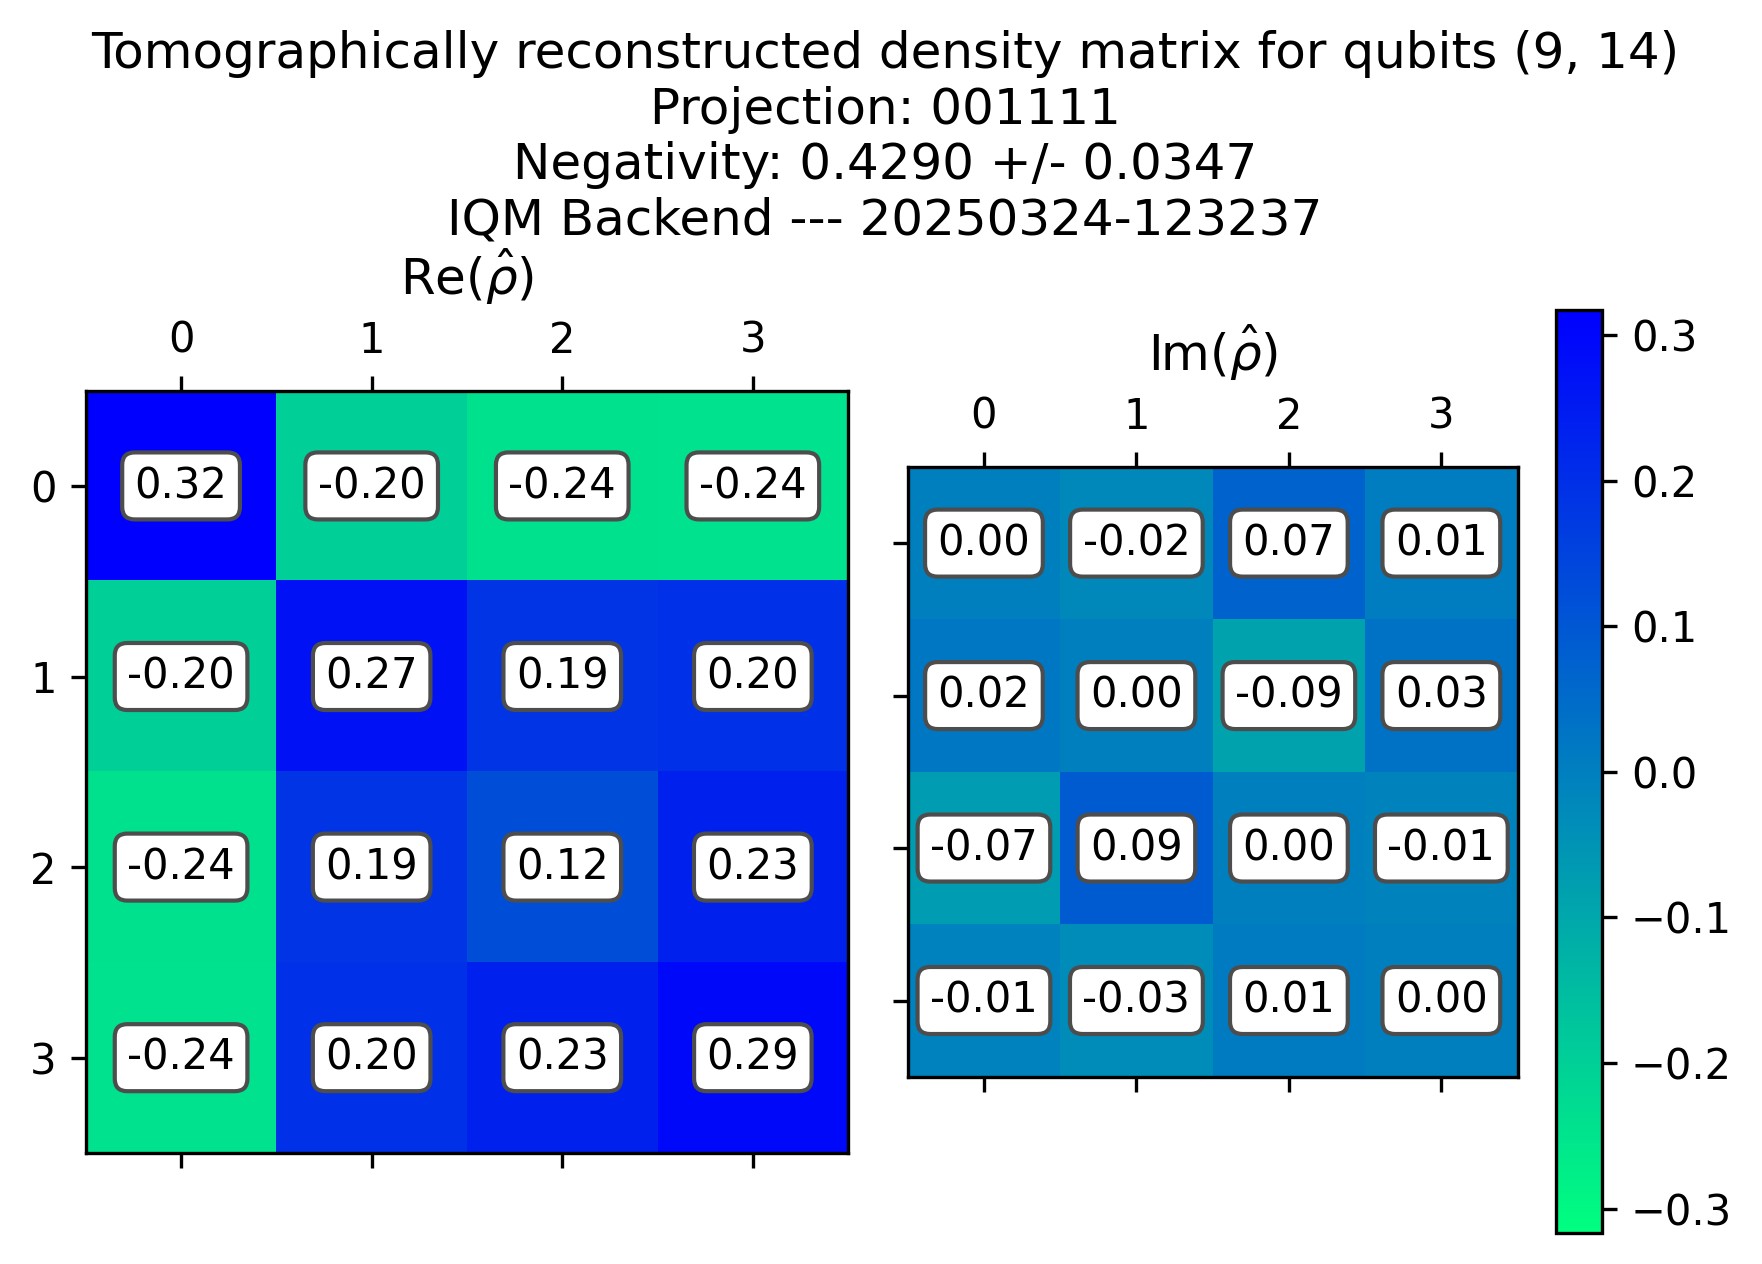

In [49]:
result_graphstate.plots[f"{highest_negativity_pair}"]

**Display max negativities in the backend graph**

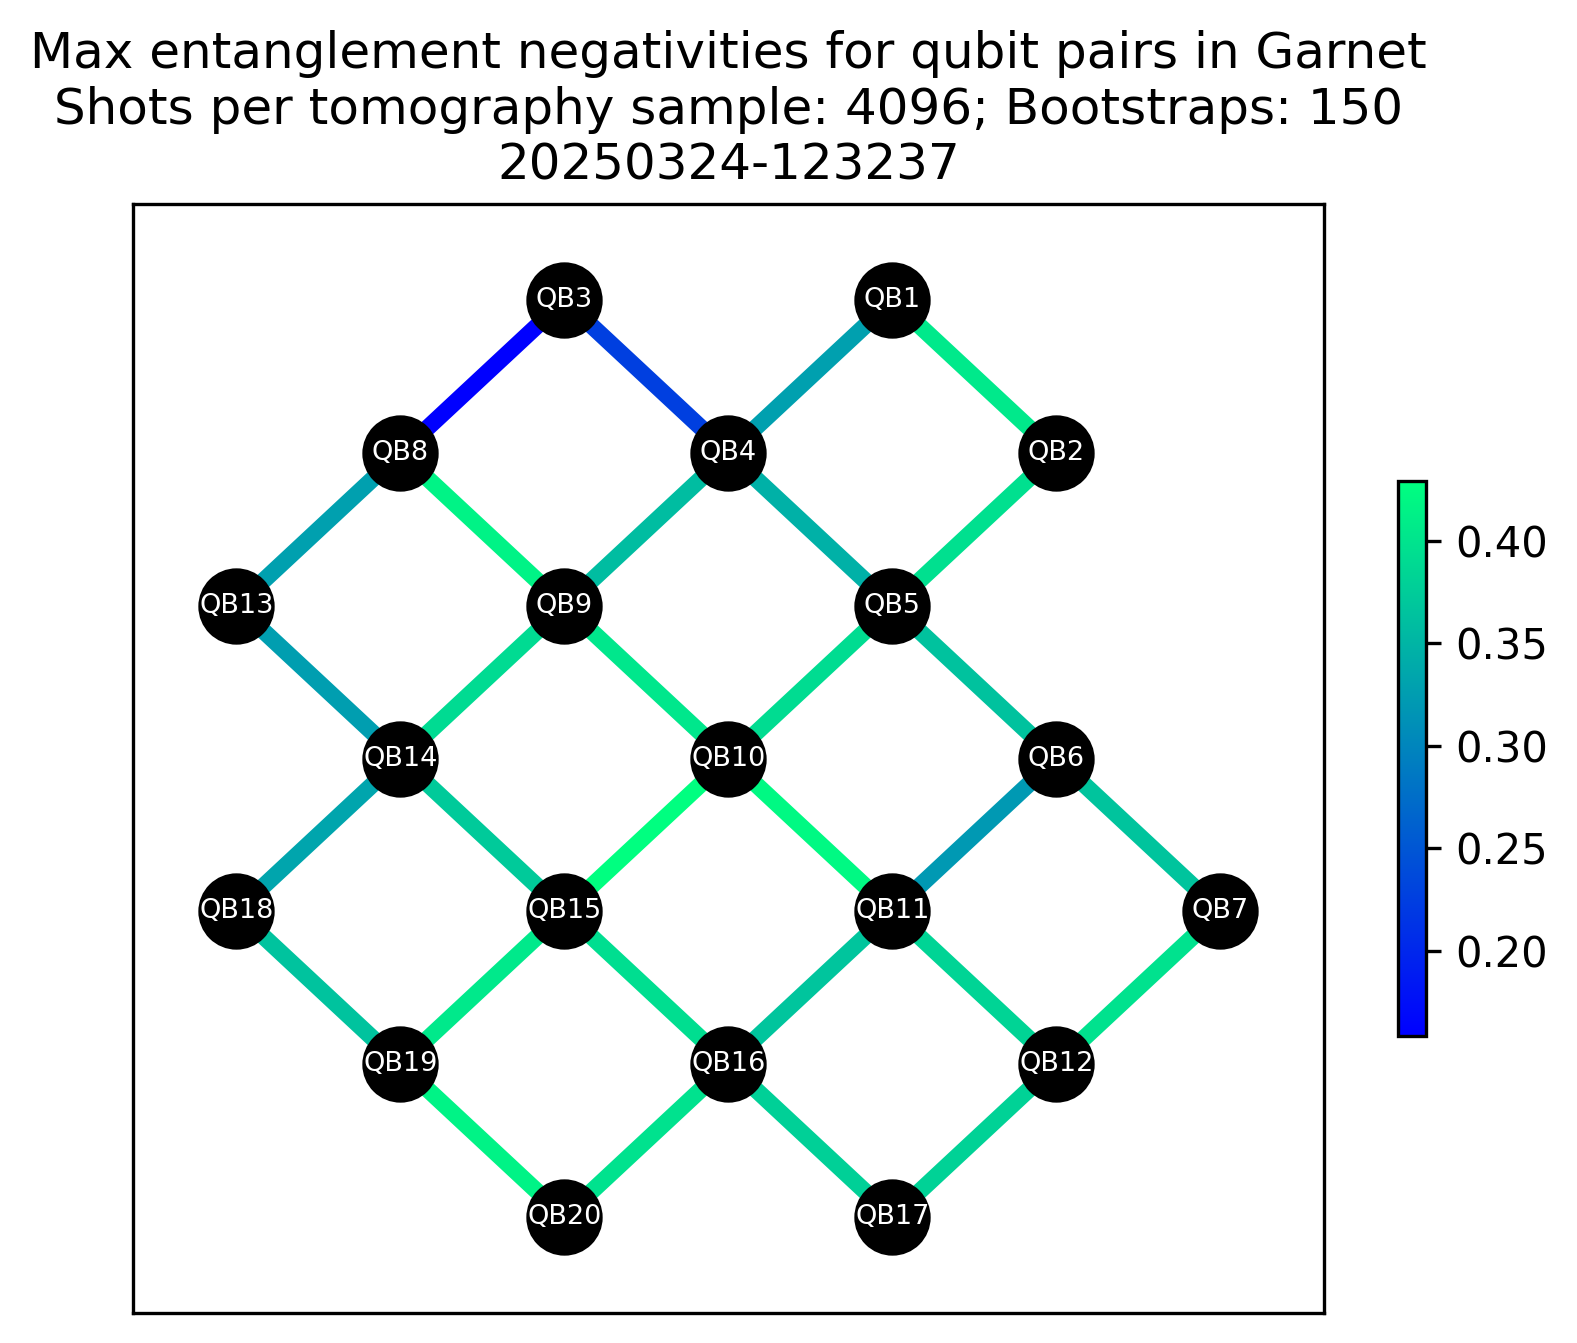

In [50]:
result_graphstate.plots['max_negativities_graph_20250324-123237']

**All available dataset attributes**

In [51]:
result_graphstate.dataset.attrs.keys()

dict_keys(['session_timestamp', 'execution_timestamp', 'backend_configuration_name', 'backend', 'backend_name', 'benchmark', 'shots', 'max_gates_per_batch', 'max_circuits_per_batch', 'calset_id', 'routing_method', 'physical_layout', 'use_dd', 'dd_strategy', 'qubits', 'tomography', 'num_bootstraps', 'n_random_unitaries', 'n_median_of_means', 'time_circuit_generation', 'all_unprojected_qubits', 'all_projected_qubits', 'all_pair_groups', 'all_neighbor_groups', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'all_tomography_states', 'all_negativities', 'max_negativities'])

**Inspect the bootstrap bias (difference between each bootstrap mean and the measured sample)**

In [52]:
for qubits, x in result_graphstate.dataset.attrs['max_negativities'].items():
    print(f"{qubits} bootstrap bias: {np.abs(x['value'] - x['boostrapped_average']):.2e}")
    print(f"\t (sample) {x['value']} | (adjusted) {(2*x['value'] - x['boostrapped_average'])}")

(11, 10) bootstrap bias: 5.03e-03
	 (sample) 0.383515153217211 | (adjusted) 0.37848666193896496
(18, 17) bootstrap bias: 1.66e-03
	 (sample) 0.36530527037592636 | (adjusted) 0.36364628822856687
(7, 12) bootstrap bias: 3.74e-03
	 (sample) 0.3280526133737927 | (adjusted) 0.3243168925142511
(3, 4) bootstrap bias: 2.02e-02
	 (sample) 0.345925664563229 | (adjusted) 0.3256998687059635
(13, 8) bootstrap bias: 1.59e-02
	 (sample) 0.39045346855162355 | (adjusted) 0.37456837432548934
(11, 16) bootstrap bias: 7.23e-04
	 (sample) 0.38127883943006924 | (adjusted) 0.3805561812223651
(5, 4) bootstrap bias: 1.01e-02
	 (sample) 0.3638697824653779 | (adjusted) 0.3537798115768033
(18, 19) bootstrap bias: 1.48e-03
	 (sample) 0.4159187229991683 | (adjusted) 0.41444124741246086
(1, 0) bootstrap bias: 8.48e-04
	 (sample) 0.40534560964287825 | (adjusted) 0.40449771127959117
(13, 14) bootstrap bias: 1.70e-02
	 (sample) 0.3723551455881536 | (adjusted) 0.35533515068638233
(5, 10) bootstrap bias: 2.86e-03
	 (samp

**All the qubit pair groups generated during execution**

In [53]:
result_graphstate.dataset.attrs["all_neighbor_groups"]

{0: [{5, 6, 9, 15, 16}, {13, 14, 19}, {2, 8, 13}, {0, 1, 2, 5, 8, 9}],
 1: [{3, 7, 9, 12, 14, 17}, {6, 10, 15}, {1, 3, 6, 9, 10}, {14, 15, 17}],
 2: [{3, 4}, {8, 9, 12, 15, 17, 18}, {4, 6, 9, 11, 15}, {3, 8, 12}],
 3: [{10, 11, 14, 19}, {4, 10, 11}, {3, 4, 7, 10, 13, 14}],
 4: [{5, 10, 16}, {4, 8, 10, 13, 15, 18}, {1, 2, 4, 8}],
 5: [{10, 14, 16, 18}, {8, 12, 14, 18}, {1, 3, 5, 8, 10, 14}],
 6: [{0, 4, 7, 8}, {9, 10, 13, 16, 18, 19}],
 7: [{4, 5, 8, 11, 14, 15}, {7, 8, 14, 17}],
 8: [{5, 9, 11, 14, 16, 19}, {0, 2, 4, 7, 9, 13}],
 9: [{2, 3, 9, 12, 13}, {0, 3, 5, 9}, {9, 13, 15, 17, 19}]}

**Inspect a graph state for some particular Pauli measurement**

In [54]:
benchmark_graphstate.circuits.benchmark_circuits[0].circuit_groups[0].circuits[7].draw(fold=0,style='iqp')

┌────────────┐                                  ░               »
      q_0 -> 0 ┤ R(π/2,π/2) ├─■──────────────■─────────────────░───────────────»
               ├────────────┤ │              │                 ░               »
      q_1 -> 1 ┤ R(π/2,π/2) ├─■──────────────┼────────■────────░───────────────»
               ├────────────┤                │        │        ░               »
      q_2 -> 2 ┤ R(π/2,π/2) ├────■───────────┼──■─────┼────────░───────────────»
               ├────────────┤    │           │  │     │        ░               »
      q_3 -> 3 ┤ R(π/2,π/2) ├─■──┼────────■──■──■─────┼────────░───────────────»
               ├────────────┤ │  │        │           │        ░               »
      q_4 -> 4 ┤ R(π/2,π/2) ├─■──┼────────┼──■─────■──■────────░───────────────»
               ├────────────┤    │        │  │     │           ░               »
      q_5 -> 5 ┤ R(π/2,π/2) ├────┼──■─────┼──┼──■──■───────────░───────────────»
               ├────────────┤    │  │     │  │  │              ░               »
      q_6 -> 6 ┤ R(π/2,π/2) ├────┼──┼──■──┼──┼──■──────────────░───────────────»
               ├────────────┤    │  │  │  │  │                 ░               »
      q_7 -> 7 ┤ R(π/2,π/2) ├────■──┼──┼──┼──┼──■──■───────────░───────────────»
               ├────────────┤       │  │  │  │  │  │           ░               »
      q_8 -> 8 ┤ R(π/2,π/2) ├─■─────┼──┼──■──┼──┼──■────────■──░───────────────»
               ├────────────┤ │     │  │     │  │           │  ░               »
      q_9 -> 9 ┤ R(π/2,π/2) ├─■─────┼──┼─────■──┼──■─────■──┼──░───────────────»
               ├────────────┤       │  │        │  │     │  │  ░ ┌───────────┐ »
    q_10 -> 10 ┤ R(π/2,π/2) ├───────■──┼──■─────┼──┼──■──■──┼──░─┤ R(-π/2,0) ├─»
               ├────────────┤          │  │     │  │  │     │  ░ ├───────────┴┐»
    q_11 -> 11 ┤ R(π/2,π/2) ├──────────■──┼──■──┼──┼──■─────┼──░─┤ R(π/2,π/2) ├»
               ├────────────┤             │  │  │  │        │  ░ └────────────┘»
    q_12 -> 12 ┤ R(π/2,π/2) ├─■───────────┼──┼──■──┼────────┼──░───────────────»
               ├────────────┤ │           │  │     │        │  ░               »
    q_13 -> 13 ┤ R(π/2,π/2) ├─■──■──■─────┼──┼─────┼────────■──░───────────────»
               ├────────────┤    │  │     │  │     │           ░               »
    q_14 -> 14 ┤ R(π/2,π/2) ├─■──■──┼─────┼──┼─────■──■────────░───────────────»
               ├────────────┤ │     │     │  │        │        ░               »
    q_15 -> 15 ┤ R(π/2,π/2) ├─■─────┼─────■──┼──■──■──┼────────░───────────────»
               ├────────────┤       │        │  │  │  │        ░               »
    q_16 -> 16 ┤ R(π/2,π/2) ├───────┼────────■──■──┼──┼────────░───────────────»
               ├────────────┤       │              │  │        ░               »
    q_17 -> 17 ┤ R(π/2,π/2) ├─■─────■──────────────┼──┼────────░───────────────»
               ├────────────┤ │                    │  │        ░               »
    q_18 -> 18 ┤ R(π/2,π/2) ├─■──■─────────────────┼──■────────░───────────────»
               ├────────────┤    │                 │           ░               »
    q_19 -> 19 ┤ R(π/2,π/2) ├────■─────────────────■───────────░───────────────»
               └────────────┘                                  ░               »
tomo_qubits: 2/════════════════════════════════════════════════════════════════»
                                                                               »
  neighbors: 5/════════════════════════════════════════════════════════════════»
                                                                               »
«                            ░                      
«      q_0 -> 0 ─────────────░──────────────────────
«                            ░                      
«      q_1 -> 1 ─────────────░──────────────────────
«                            ░                      
«      q_2 -> 2 ─────────────░──────────────────────
«                            ░                      